In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (RandomForestClassifier,
GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings
warnings.filterwarnings('ignore')


data = pd.read_excel('sample.xlsx')

print(data.head())

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   Amount_Claimed  Ancillary_Claimed_Amount  Ancillary_Paid_Amount  \
0            1062                       158                     67   
1             838                       234                      8   
2             970                       151                    120   
3            1075                        14                      3   
4            1171                        82                     42   

   Amount_Pending  Amount_Adjusted  CoPay_Amount  Co_Ins_Amount  Deductible  \
0             256              117            26              2         246   
1             471              240             3              9         471   
2             375               25            25              1         267   
3             510              160            25              5         265   
4             381              205            13              6         140   

   Amount_Paid  
0          738  
1          123  
2          772  
3          623  
4          849  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (RandomForestClassifier,
GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

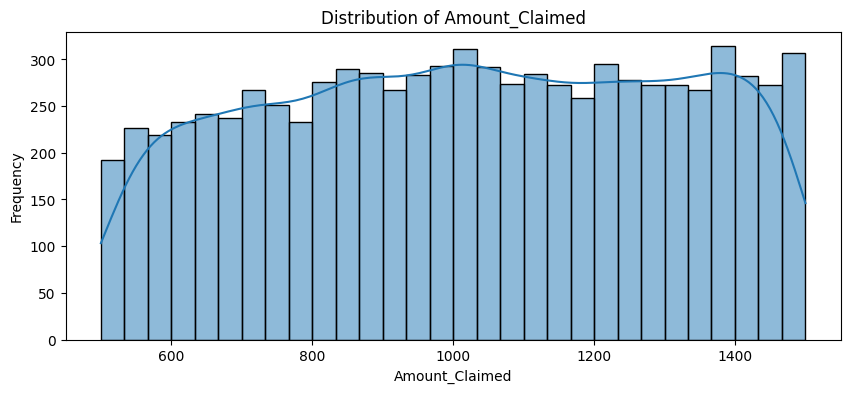

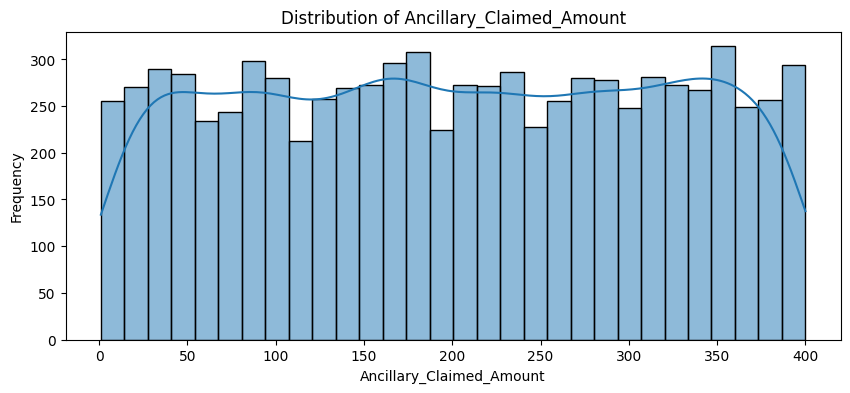

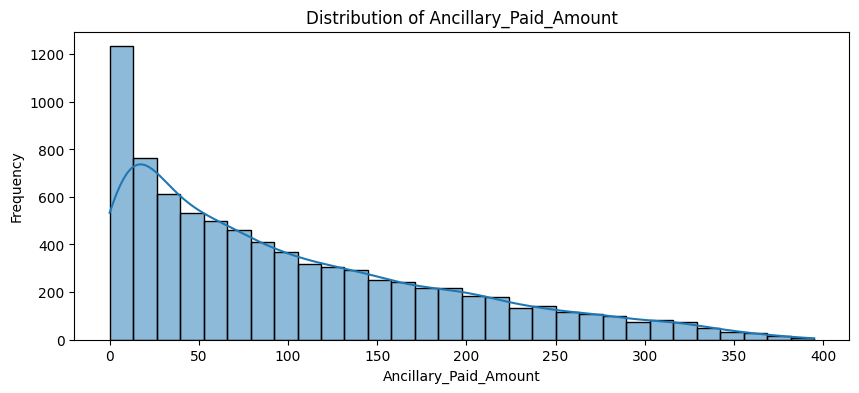

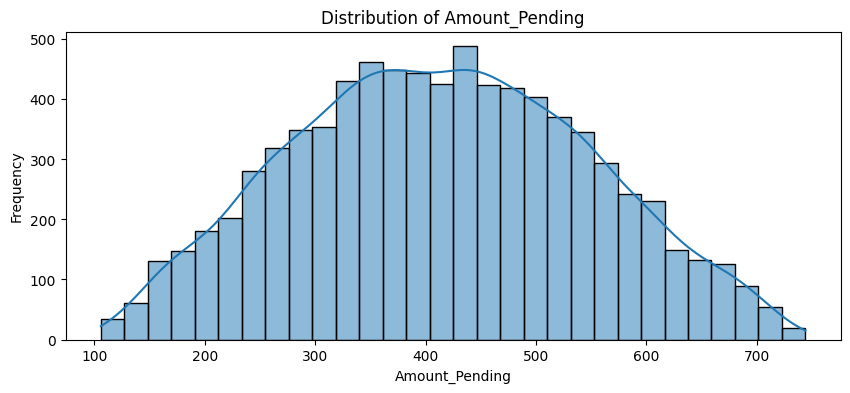

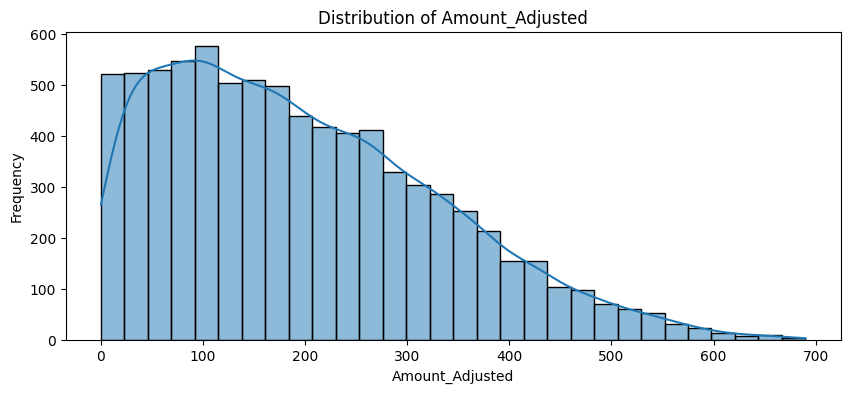

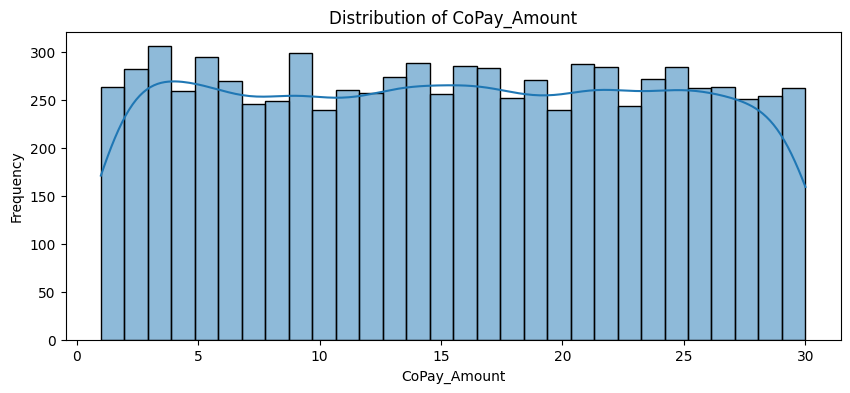

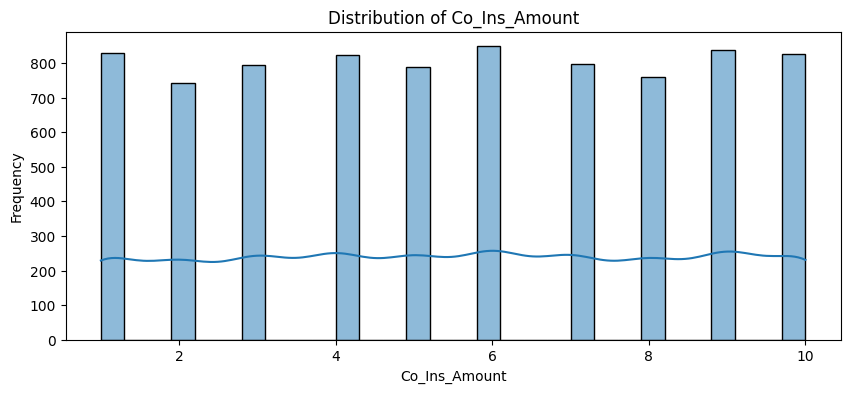

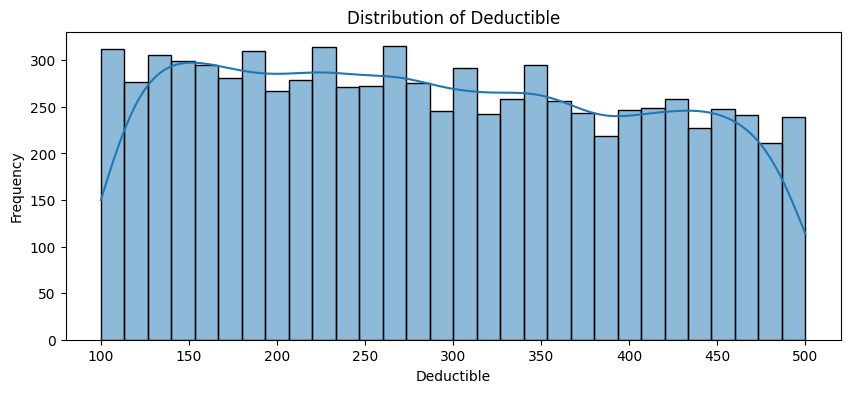

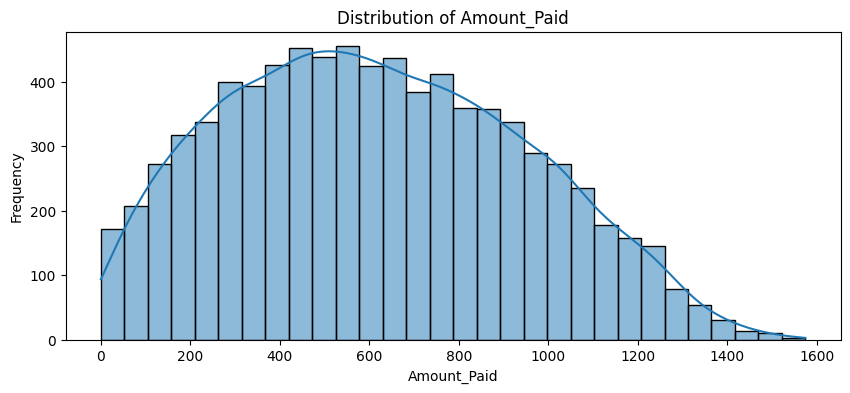

In [ ]:
# Plot distributions for numerical features
num_features = data.select_dtypes(include=[np.number]).columns
x_features=['Amount_Claimed','Ancillary_Claimed_Amount','Ancillary_Paid_Amount','Amount_Pending','Amount_Adjusted','Co_pay_Amount','Deductible','Amount_Paid']
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.histplot(data[feature], kde=True, bins=30)
 plt.title(f'Distribution of {feature}')
 plt.xlabel(feature)
 plt.ylabel('Frequency')
 plt.show()

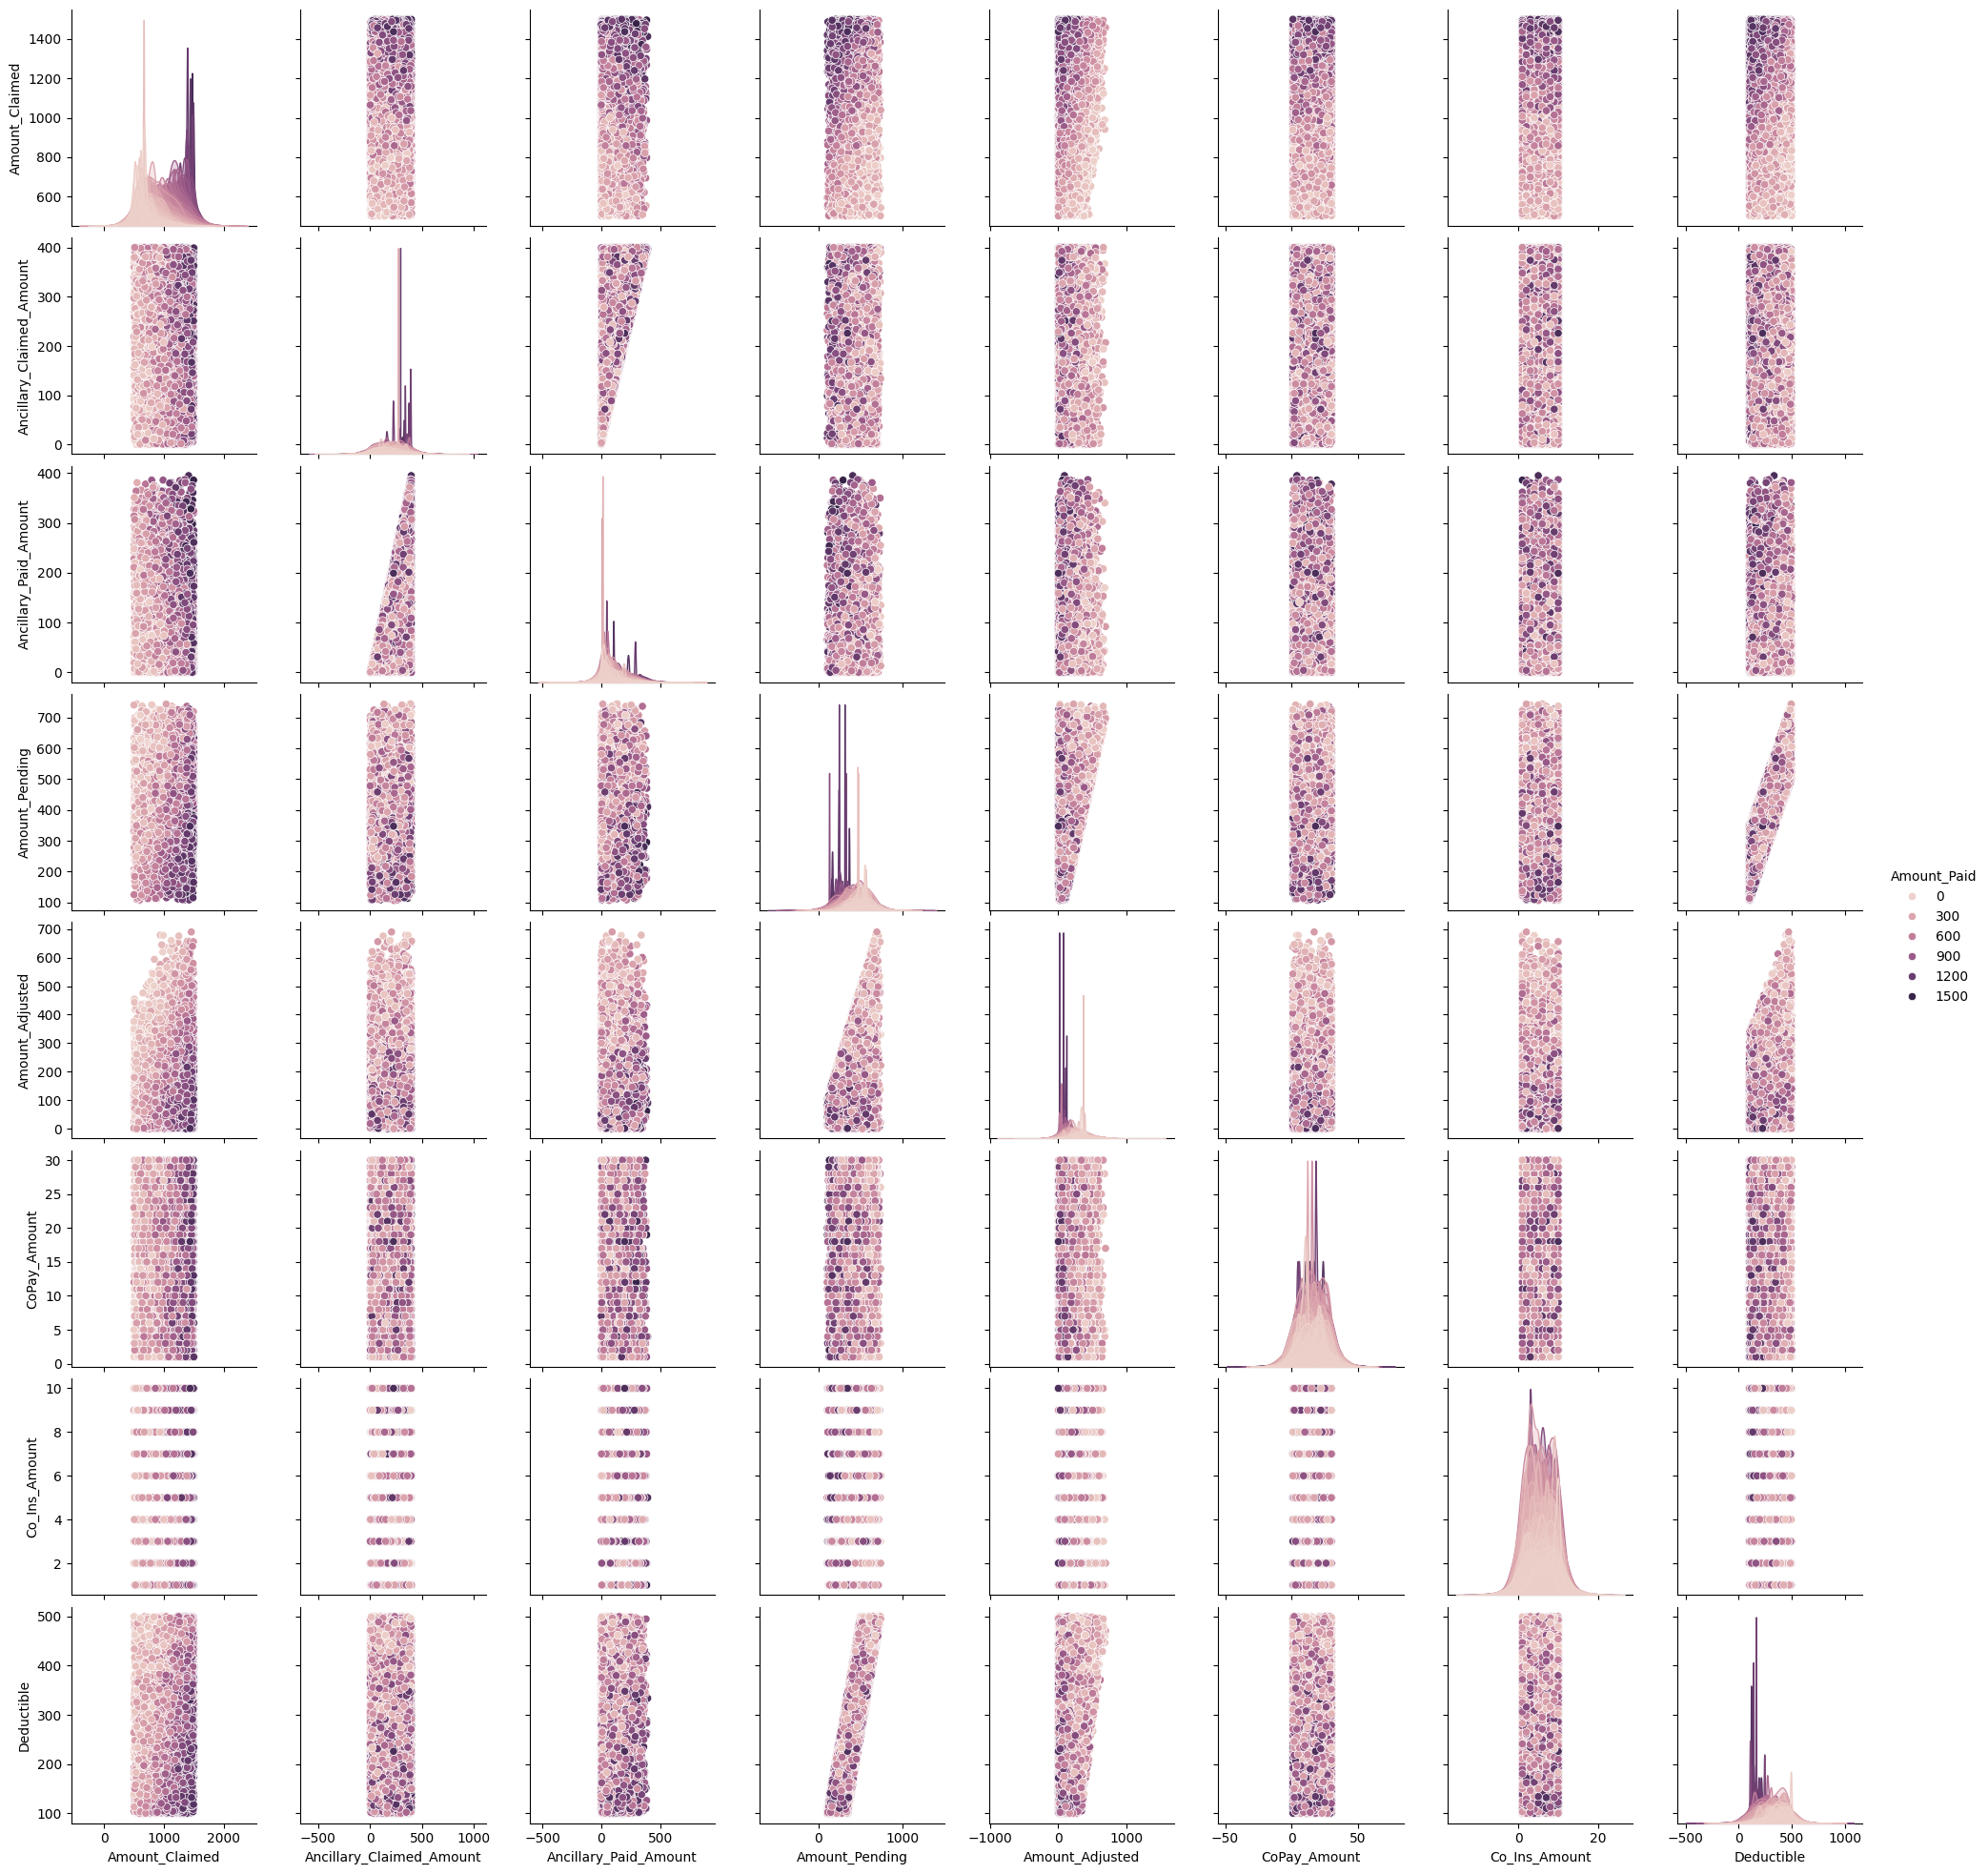

In [ ]:
# Scatter plot for numerical features
sns.pairplot(data, hue='Amount_Paid') # Replace 'target' with your targetcolumn name
plt.show()

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

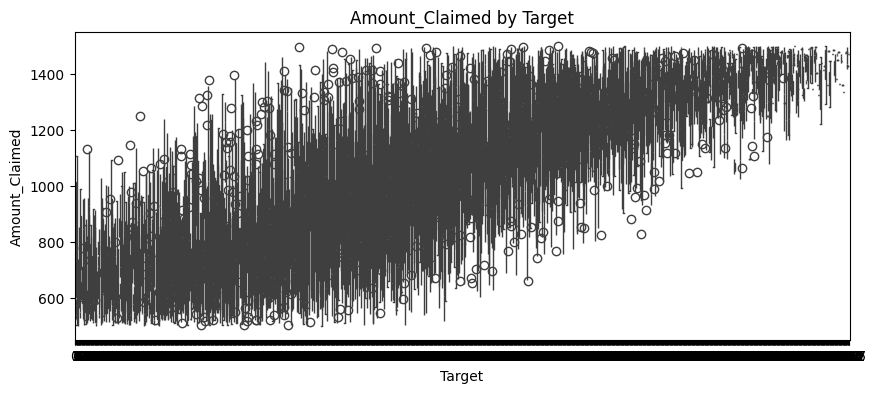

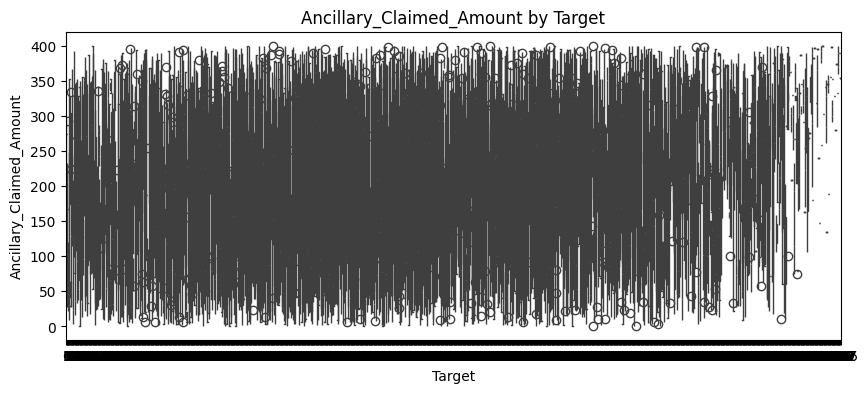

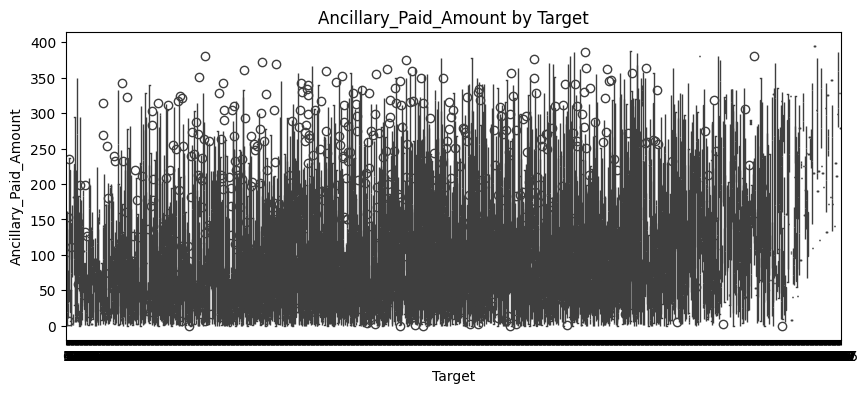

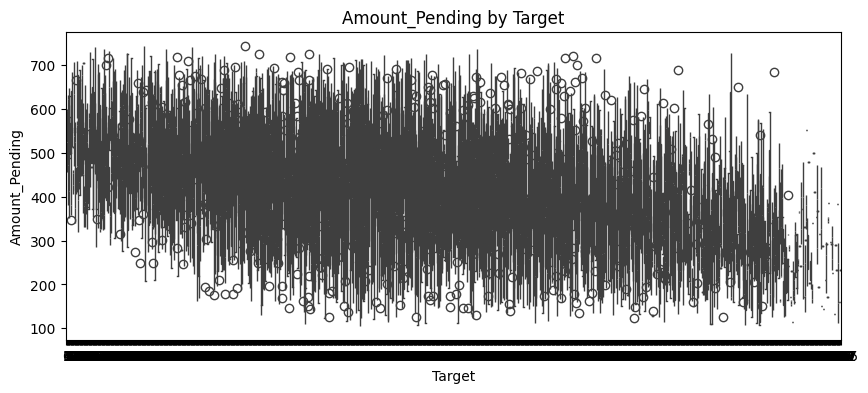

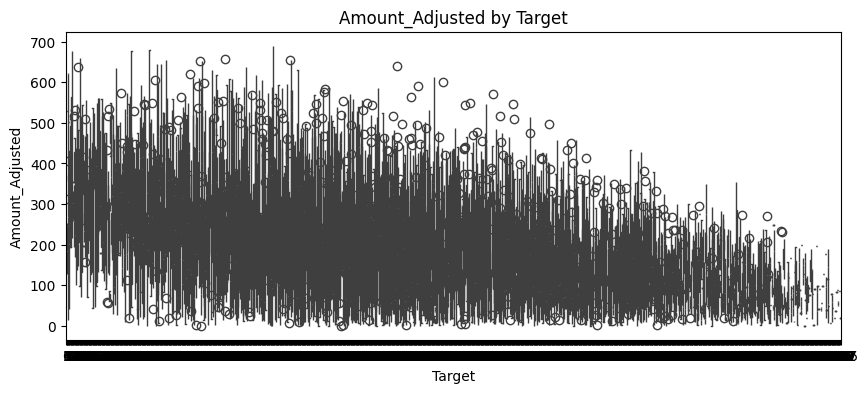

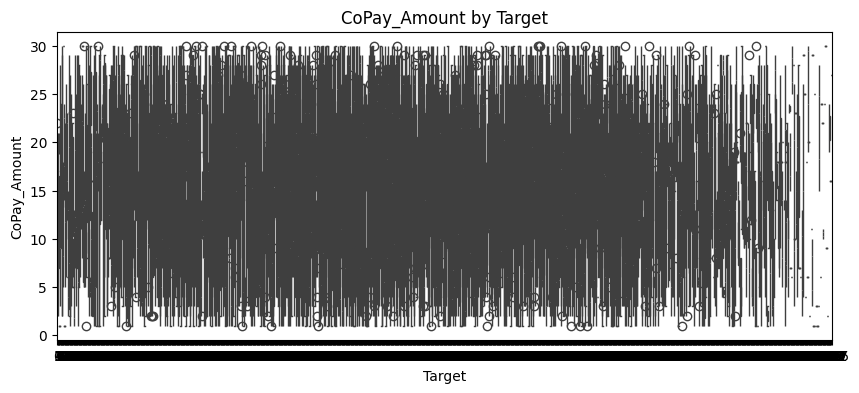

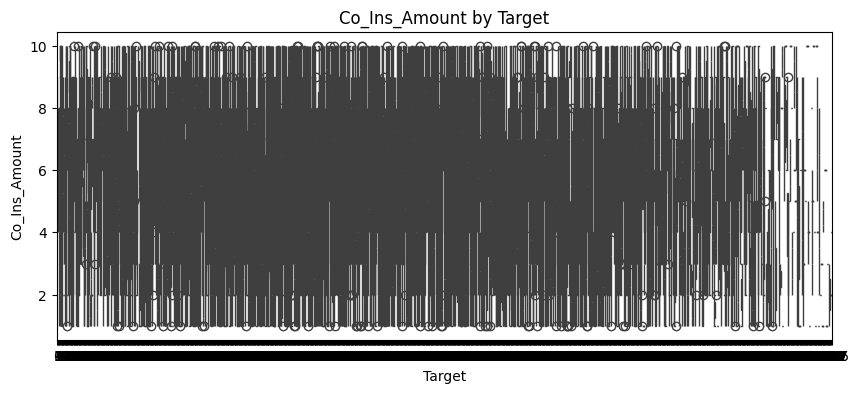

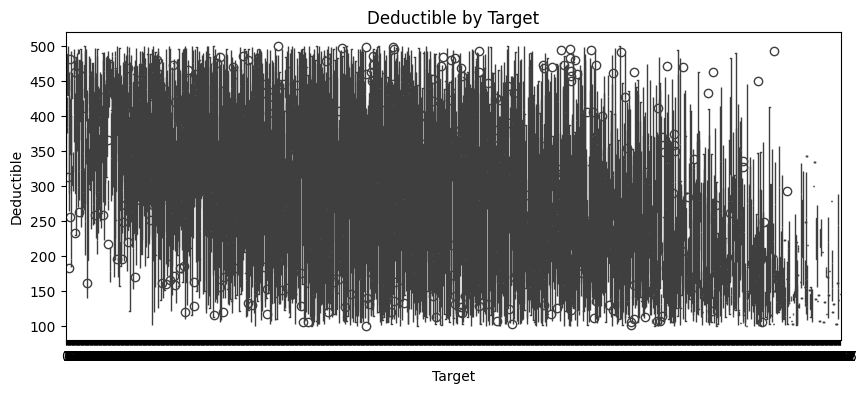

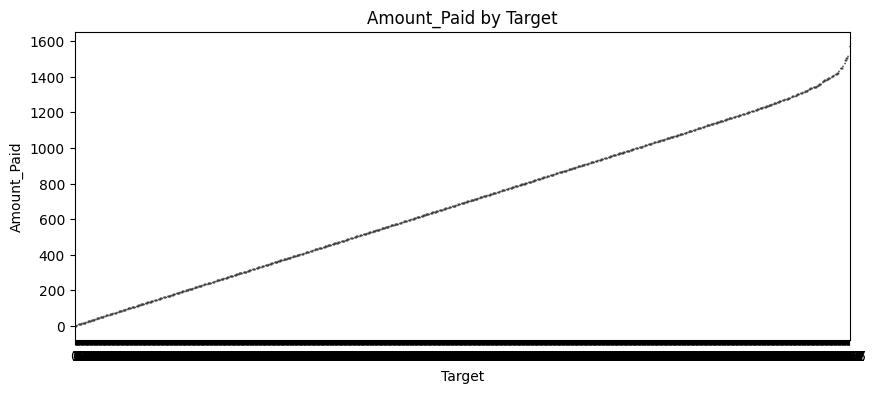

KeyboardInterrupt: 

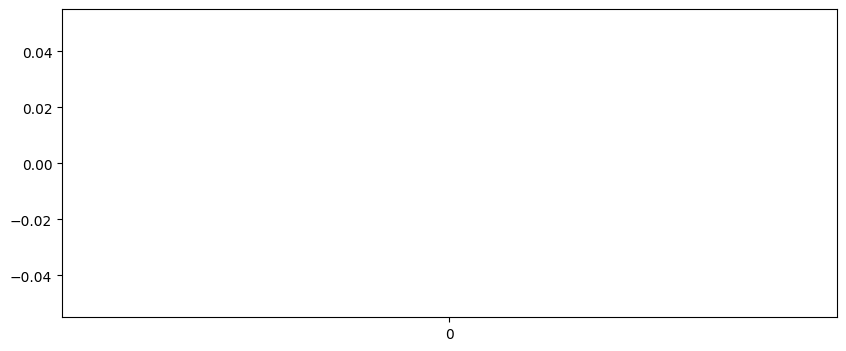

In [ ]:
# Box plots to check the distribution of numerical features by categorical features
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.boxplot(x='Amount_Paid', y=feature, data=data) # Replace 'target'with your target column name
 plt.title(f'{feature} by Target')
 plt.xlabel('Target')
 plt.ylabel(feature)
 plt.show()
# Violin plots for better understanding of distribution
for feature in num_features:
 plt.figure(figsize=(10, 4))
 sns.violinplot(x='Amount_Paid', y=feature, data=data) # Replace'target' with your target column name
 plt.title(f'{feature} Distribution by Target')
 plt.xlabel('Target')
 plt.ylabel(feature)
 plt.show()

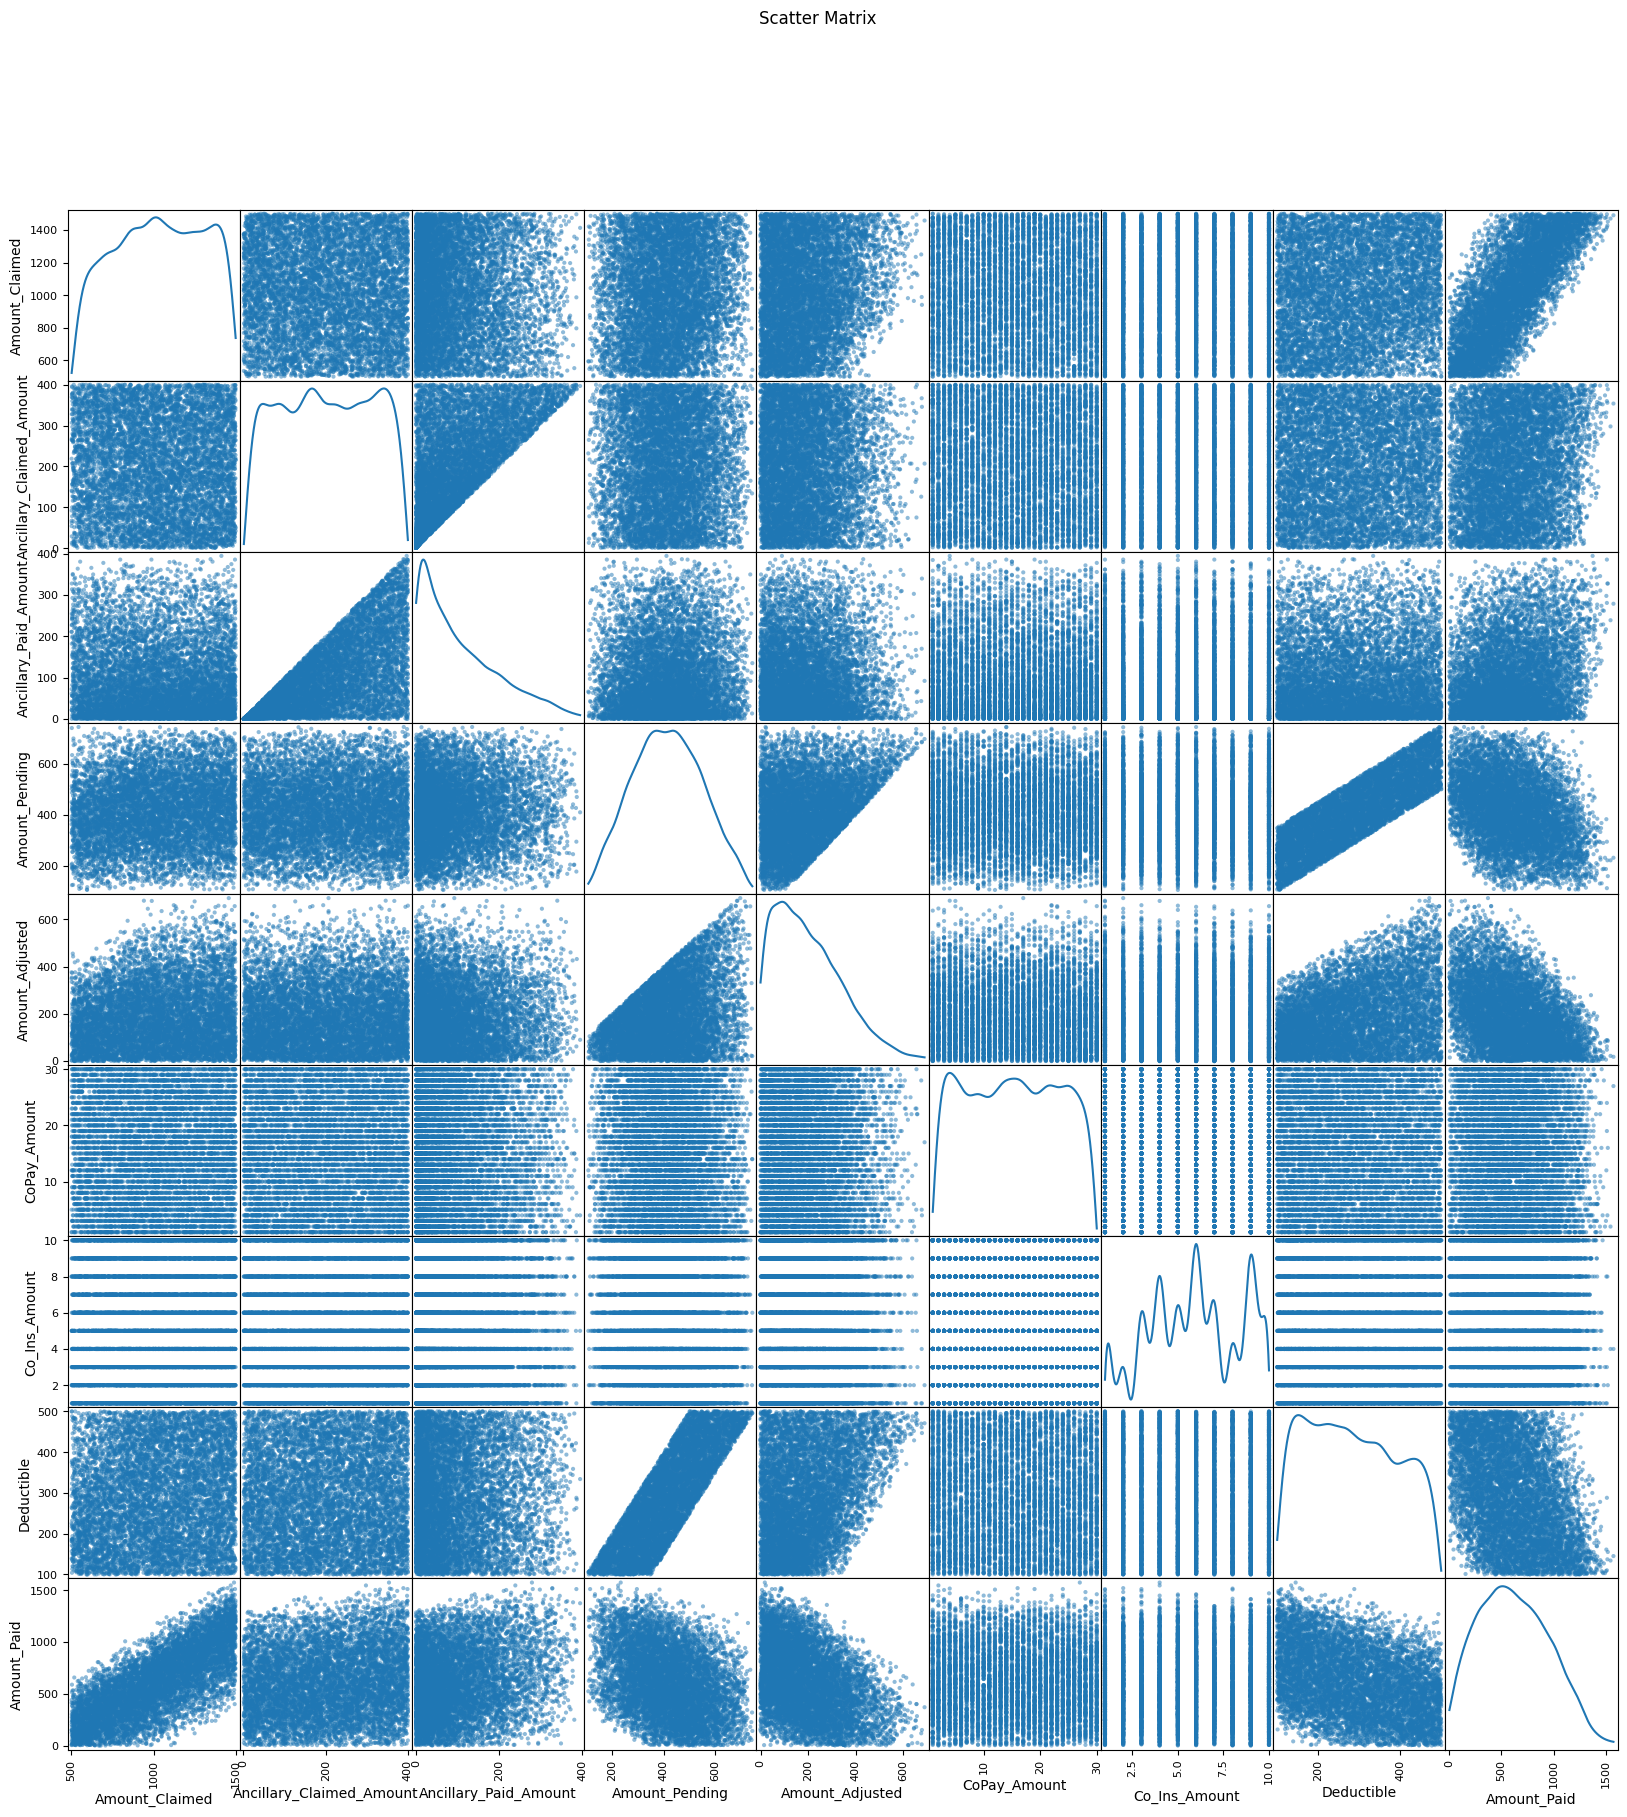

In [ ]:
# Scatter matrix for pairwise relationships
from pandas.plotting import scatter_matrix # Import the scatter_matrix function
scatter_matrix(data[num_features], figsize=(20, 20), diagonal='kde')
plt.suptitle('Scatter Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

data = pd.read_excel('HI dataset modified.xlsx')

print(data.head())

X = data.drop('Amount_Paid', axis=1)
y = data['Amount_Paid']

   Amount_Claimed  Ancillary_Claimed_Amount  Ancillary_Paid_Amount  \
0            1062                       158                     67   
1             838                       234                      8   
2             970                       151                    120   
3            1075                        14                      3   
4            1171                        82                     42   

   Amount_Pending  Amount_Adjusted  CoPay_Amount  Co_Ins_Amount  Deductible  \
0             256              117            26              2         246   
1             471              240             3              9         471   
2             375               25            25              1         267   
3             510              160            25              5         265   
4             381              205            13              6         140   

   Amount_Paid  
0          738  
1          123  
2          772  
3          623  
4          849  


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load your dataset
data = pd.read_excel('HI dataset modified.xlsx')

# Preview the dataset
print(data.head())

# Prepare features and target variable
X = data.drop('Amount_Paid', axis=1)  # Features (dropping target variable)
y = data['Amount_Paid']  # Target variable

# Concatenate X and y for easy calculation of statistics
data_combined = pd.concat([X, y], axis=1)

# Function to calculate skewness and kurtosis for each column
def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns)

    # Calculate the mean
    stats['Mean'] = df.mean()

    # Calculate the variance
    stats['Variance'] = df.var()

    # Calculate the standard deviation
    stats['Std'] = df.std()

    # Calculate skewness
    stats['Skewness'] = df.apply(lambda x: skew(x, nan_policy='omit'))

    # Calculate kurtosis
    stats['Kurtosis'] = df.apply(lambda x: kurtosis(x, nan_policy='omit'))

    # Calculate range (max - min)
    stats['Range'] = df.max() - df.min()

    return stats

# Apply the function to calculate statistics for all columns
statistics = calculate_statistics(data_combined)

# Display the statistics
print(statistics)


   Amount_Claimed  Ancillary_Claimed_Amount  Ancillary_Paid_Amount  \
0            1062                       158                     67   
1             838                       234                      8   
2             970                       151                    120   
3            1075                        14                      3   
4            1171                        82                     42   

   Amount_Pending  Amount_Adjusted  CoPay_Amount  Co_Ins_Amount  Deductible  \
0             256              117            26              2         246   
1             471              240             3              9         471   
2             375               25            25              1         267   
3             510              160            25              5         265   
4             381              205            13              6         140   

   Amount_Paid  
0          738  
1          123  
2          772  
3          623  
4          849  
  

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Define models (using the same models as before)
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Extra Trees': ExtraTreeRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

cv_folds = 10

cv_results = {}

# Loop through models
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')

    mse_scores = -scores
    mean_mse = np.mean(mse_scores)
    mean_rmse = np.sqrt(mean_mse)

    r2_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='r2')
    mean_r2 = np.mean(r2_scores)

    cv_results[name] = {
        'Mean MSE': mean_mse,
        'Mean R²': mean_r2,
        'Mean RMSE': mean_rmse
    }

cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)


                               Mean MSE   Mean R²   Mean RMSE
Ridge Regression           4.073418e-09  1.000000    0.000064
Lasso Regression           1.367751e-01  0.999999    0.369831
Extra Trees                6.422968e+03  0.943679   80.143420
Decision Tree              4.806760e+03  0.955466   69.330802
Random Forest              1.225022e+03  0.988791   35.000308
Gradient Boosting          8.510110e+02  0.992129   29.172093
Support Vector Regression  1.013831e+04  0.906347  100.689185
XGBoost                    9.379614e+02  0.991319   30.626156
K-Nearest Neighbors        1.608164e+03  0.985115   40.101926
AdaBoost                   8.793310e+03  0.918398   93.772650


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Define models (using the same models as before)
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Extra Trees': ExtraTreesRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

test_results = {}

# Loop through models to fit and evaluate on test data
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE, R², and RMSE on the test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results for each model
    test_results[name] = {
        'MSE': mse,
        'R²': r2,
        'RMSE': rmse
    }

# Convert results to a DataFrame for better visualization
test_results_df = pd.DataFrame(test_results).T
print(test_results_df)


                                    MSE        R²       RMSE
Ridge Regression           3.275345e-09  1.000000   0.000057
Lasso Regression           1.357116e-01  0.999999   0.368391
Extra Trees                6.300536e+02  0.994180  25.100868
Decision Tree              4.673886e+03  0.956829  68.365827
Random Forest              1.168973e+03  0.989203  34.190254
Gradient Boosting          8.096572e+02  0.992521  28.454475
Support Vector Regression  8.109271e+03  0.925097  90.051493
XGBoost                    8.046300e+02  0.992568  28.366001
K-Nearest Neighbors        1.446147e+03  0.986642  38.028234
AdaBoost                   8.923156e+03  0.917580  94.462460


In [ ]:
!pip install shap


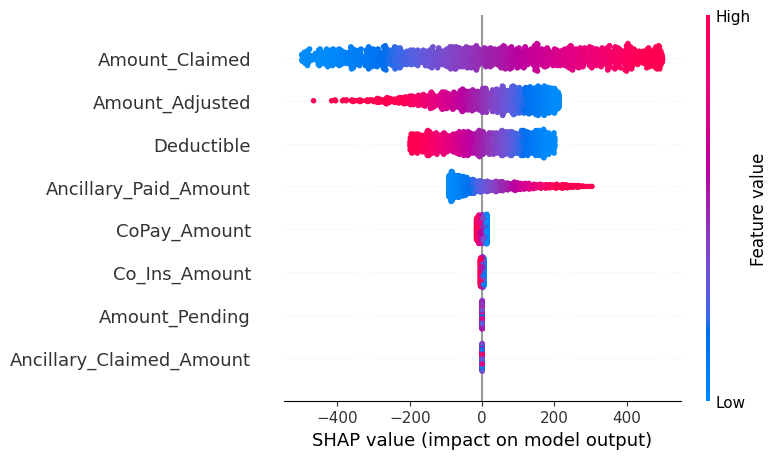

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Assuming X_train is a pandas DataFrame
feature_names = X_train.columns  # Get the feature names from the DataFrame

# Fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Use the best alpha if tuned
ridge_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(ridge_model, X_train)  # Fit on the training data

# Get SHAP values for the test data
shap_values = explainer(X_test)

# Plot the SHAP summary plot for all features
shap.summary_plot(shap_values, X_test, feature_names=feature_names)



In [ ]:
!pip install lime


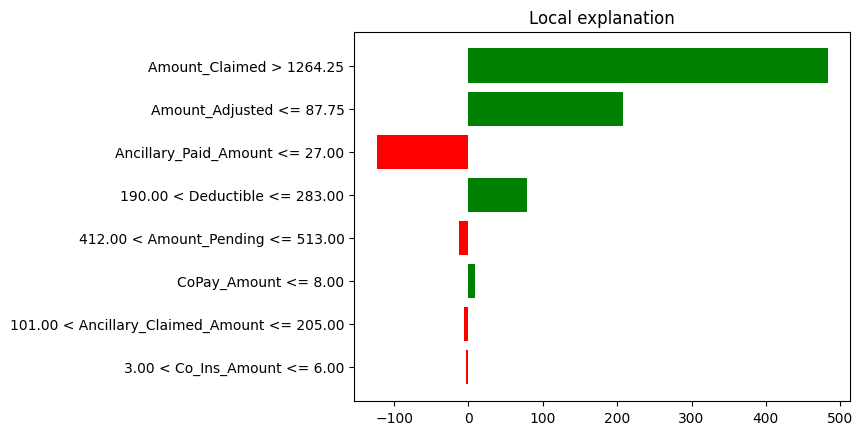

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Assuming X_train and X_test are pandas DataFrames
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Create a LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    mode="regression",
    training_labels=np.array(y_train),
    feature_names=feature_names,
    discretize_continuous=True
)

instance_idx = 0
instance = X_test.iloc[instance_idx]


explanation = explainer_lime.explain_instance(
    instance,
    ridge_model.predict,
    num_features=10
)

# Plot the explanation
explanation.as_pyplot_figure()
plt.show()


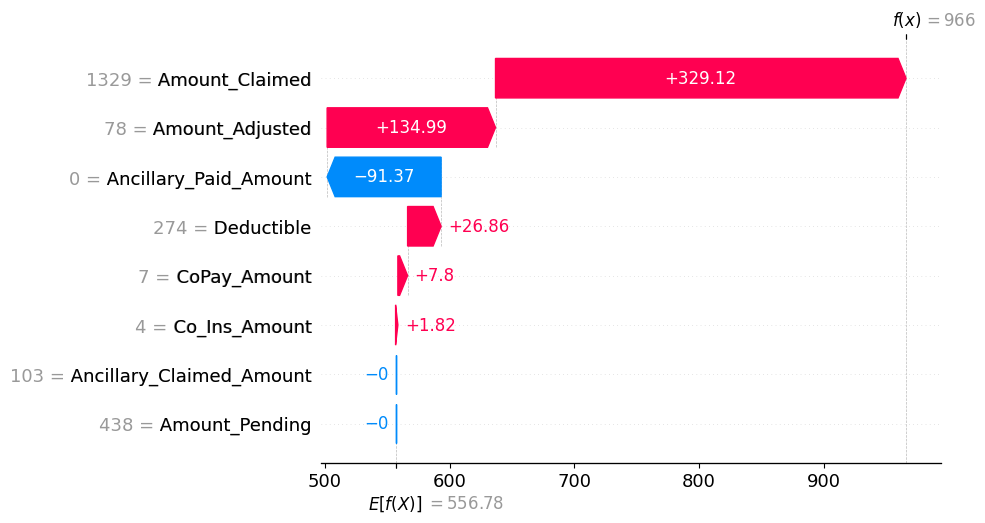

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(ridge_model, X_train)  # Fit on training data

instance_idx = 0
instance = X_test.iloc[[instance_idx]]  # Get the row as a DataFrame using [[instance_idx]]

# Get SHAP values for the selected instance
shap_values = explainer(instance)

# Generate a SHAP waterfall plot for the selected instance
shap.waterfall_plot(shap_values[0])  # Pass the SHAP values for the first instance
plt.show()